In [1]:
import pandas as pd
df = pd.read_excel("C:/Users/gupta/Python jypter notebook/Data/excel1.xlsx")

In [2]:
df.shape

(125, 87)

In [3]:
pd.set_option('display.max_rows', None)
df.isnull().sum().sort_values(ascending=False)

Career progress rank 2018                    86
Female students (%) 2019                     79
International course experience rank 2021    75
Threeyear average 2020                       51
Threeyear average 2022                       50
Rank in 2018                                 48
Threeyear average 2018                       43
Threeyear average 2019                       41
Rank in 2020                                 35
Overall satisfaction 2020                    35
Value for money rank 2020                    35
International work mobility rank 2020        35
Women on board (%) 2020                      35
International faculty (%) 2020               35
Faculty with doctorates (%) 2020             35
Salary percentage increase 2020              35
Weighted salary (US$) 2020                   35
International students (%) 2020              35
Female faculty (%) 2020                      35
Female students (%) 2020                     35
International board (%) 2020            

In [4]:
df.drop("Career progress rank 2018", inplace=True, axis=1)
df.drop("Female students (%) 2019", inplace=True, axis=1)
df.drop("International course experience rank 2021", inplace=True, axis=1)

In [5]:
numerical_columns = df.select_dtypes(include=['number'])
print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
      Rank  Careers service rank 2022  Careers service rank 2021  \
0      1.0                        1.0                        1.0   
1      2.0                       16.0                       11.0   
2      3.0                       32.0                       35.0   
3      4.0                        8.0                       20.0   
4      5.0                       49.0                       67.0   
5      6.0                       23.0                       14.0   
6      7.0                        7.0                        7.0   
7      8.0                        6.0                        8.0   
8      9.0                       21.0                       59.0   
9     10.0                       18.0                       61.0   
10    11.0                       35.0                       24.0   
11    12.0                        4.0                       10.0   
12    12.0                       96.0                        NaN   
13    14.0                   

In [6]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
                                           School Name Threeyear average 2021  \
0                              University of St Gallen                      1   
1                                            HEC Paris                      2   
2    Rotterdam School of Management, Erasmus Univer...                      5   
3                        Stockholm School of Economics                      9   
4                                 ESCP Business School                      6   
5                                Essec Business School                      4   
6                               London Business School                      4   
7                   University College Dublin: Smurfit                      6   
8                               EMLyon Business School                     30   
9                                          ESMT Berlin                     24   
10   Tsinghua University School of Economics and Ma...                      0   
11     

In [7]:
df['Threeyear average 2021'].fillna(0, inplace=True)
df['Threeyear average 2021'].replace('-', 0, inplace=True)
df['Threeyear average 2021'] = df['Threeyear average 2021'].astype(int)

In [8]:
df.columns

Index(['Rank', 'School Name', 'Careers service rank 2022',
       'Careers service rank 2021', 'Careers service rank 2020',
       'Careers service rank 2019', 'International board (%) 2022',
       'International board (%) 2021', 'International board (%) 2020',
       'International board (%) 2019', 'International board (%) 2018',
       'International course experience rank 2022',
       'International course experience rank 2020',
       'International course experience rank 2019', 'Threeyear average 2022',
       'Threeyear average 2021', 'Threeyear average 2020',
       'Threeyear average 2019', 'Threeyear average 2018',
       'Faculty with doctorates (%) 2022', 'Faculty with doctorates (%) 2021',
       'Faculty with doctorates (%) 2020', 'Faculty with doctorates (%) 2019',
       'Faculty with doctorates (%) 2018',
       'International work mobility rank 2022',
       'International work mobility rank 2021',
       'International work mobility rank 2020',
       'International

In [9]:
df.drop("Rank", inplace=True, axis=1)

In [10]:
df["binned_group"] = pd.cut(df["Rank in 2022"], bins = 10, labels=["1-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90","91-100"])

In [11]:
df['binned_group'] = df['binned_group'].cat.add_categories('Do Not Stand in Ranking')
df['binned_group'] = df['binned_group'].fillna('Do Not Stand in Ranking')

In [12]:
df['binned_group']

0                         1-10
1                         1-10
2                         1-10
3                         1-10
4                         1-10
5                         1-10
6                         1-10
7                         1-10
8                         1-10
9                         1-10
10                       11-20
11                       11-20
12                       11-20
13                       11-20
14                       11-20
15                       11-20
16                       11-20
17                       11-20
18                       11-20
19                       11-20
20                       21-30
21                       21-30
22                       21-30
23                       21-30
24                       21-30
25                       21-30
26                       21-30
27                       21-30
28                       21-30
29                       21-30
30                       31-40
31                       31-40
32      

In [13]:
df.columns

Index(['School Name', 'Careers service rank 2022', 'Careers service rank 2021',
       'Careers service rank 2020', 'Careers service rank 2019',
       'International board (%) 2022', 'International board (%) 2021',
       'International board (%) 2020', 'International board (%) 2019',
       'International board (%) 2018',
       'International course experience rank 2022',
       'International course experience rank 2020',
       'International course experience rank 2019', 'Threeyear average 2022',
       'Threeyear average 2021', 'Threeyear average 2020',
       'Threeyear average 2019', 'Threeyear average 2018',
       'Faculty with doctorates (%) 2022', 'Faculty with doctorates (%) 2021',
       'Faculty with doctorates (%) 2020', 'Faculty with doctorates (%) 2019',
       'Faculty with doctorates (%) 2018',
       'International work mobility rank 2022',
       'International work mobility rank 2021',
       'International work mobility rank 2020',
       'International work mo

In [14]:
X = df.drop(['School Name','Programme name','binned_group'], axis=1).values

In [15]:
X.shape

(125, 81)

In [16]:
y= df["binned_group"].values

In [17]:
y.shape

(125,)

We are splitting the data before imputing to avoid data leakage- 

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.impute import SimpleImputer
import numpy as np
imp_num = SimpleImputer(strategy='mean')
X_train = imp_num.fit_transform(X_train)
X_test = imp_num.transform(X_test)

In [20]:
nan_count = np.isnan(X_train).sum()
print("Number of NaN values:", nan_count)

Number of NaN values: 0


In [21]:
nan_count = np.isnan(X_test).sum()
print("Number of NaN values:", nan_count)

Number of NaN values: 0


(100, 81)
(100,)


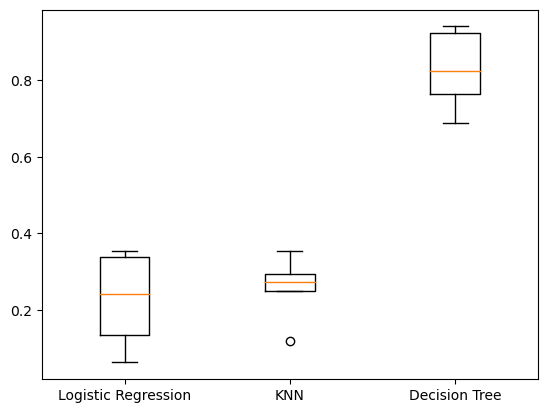

In [22]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(y_train.shape)
models = {"Logistic Regression": LogisticRegression(max_iter=1000), "KNN": KNeighborsClassifier(),
"Decision Tree": DecisionTreeClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [23]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.4
KNN Test Set Accuracy: 0.32
Decision Tree Test Set Accuracy: 0.92


## Use XGBOOST, or CATBOOST, or ADABOOST

In [24]:
!pip install xgboost

In [26]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)

# Now you can use y_train_encoded with XGBoost
dtrain_reg = xgb.DMatrix(X_train, y_train_encoded, enable_categorical=True)


# Create regression matrices
#dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
#dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [28]:
# Define hyperparameters
params = {"objective": "reg:squarederror", "tree_method": "hist"}
n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [32]:
from sklearn.metrics import mean_squared_error

preds = model.predict(X_test)
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'numpy.ndarray'>)